In [14]:
import os
import sys
import glob
import cv2

import pandas as pd
import numpy as np
from natsort import natsorted

import matplotlib
# matplotlib.use('TkAgg')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

%matplotlib notebook



In [26]:
def parse_vth(vth_file):
    print(vth_str.shape)
    print(vth_str[0])
    vth_dat = []
    for vth_row in vth_str:
        vth_dat.append(np.float32(vth_row.split()))
    vth_dat = np.array(vth_dat, dtype=np.float32)
    print(vth_dat.shape)
    return vth_dat


def parse_z(z_file):
    print(z_str.shape)
    print(z_str[:5])
    z_dat = []
    for z_row in z_str[5:]: # Parse from the line number 5th
        z_dat.append(np.float32(z_row.split()))
    z_dat = np.array(z_dat, dtype=np.float32)
    print(z_dat.shape)
    return z_dat


['data/VTH/VTH 360s.dat', 'data/VTH/VTH 720s.dat', 'data/VTH/VTH 1080s.dat', 'data/VTH/VTH 1440s.dat', 'data/VTH/VTH 1800s.dat', 'data/VTH/VTH 2160s.dat', 'data/VTH/VTH 2520s.dat', 'data/VTH/VTH 2880s.dat', 'data/VTH/VTH 3240s.dat', 'data/VTH/VTH 3600s.dat']
['data/Z/mucnuoc 360s.grd', 'data/Z/mucnuoc 720s.grd', 'data/Z/mucnuoc 1080s.grd', 'data/Z/mucnuoc 1440s.grd', 'data/Z/mucnuoc 1800s.grd', 'data/Z/mucnuoc 2160s.grd', 'data/Z/mucnuoc 2520s.grd', 'data/Z/mucnuoc 2880s.grd', 'data/Z/mucnuoc 3240s.grd', 'data/Z/mucnuoc 3600s.grd']
**************************************************
(63684,)
360	2	2	0	0
(63684, 5)
(250,)
['DSAA' '262\t245' '1\t262' '1\t245' '-5\t5']
(245, 262)
(245, 262)


<IPython.core.display.Javascript object>


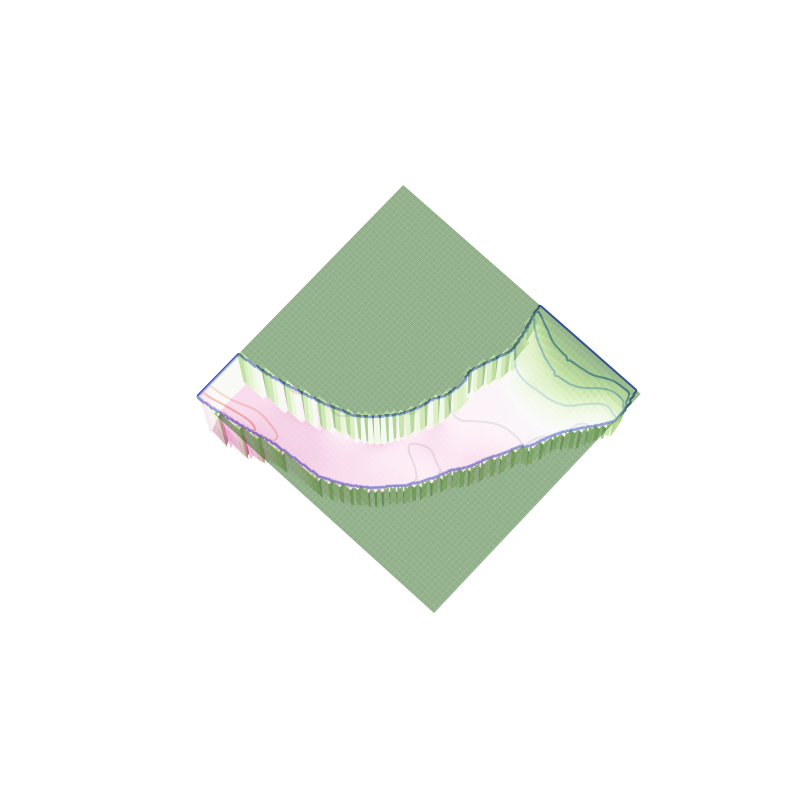

In [50]:
# Load the files of depth and vth
vth_dir = 'data/VTH/'
z_dir = 'data/Z/'

vth_files = natsorted(glob.glob(os.path.join(vth_dir, '*.dat')))
z_files = natsorted(glob.glob(os.path.join(z_dir, '*.grd')))

print(vth_files[:10])
print(z_files[:10])

idx = 0
for vth_file, z_file in zip(vth_files[1:2], z_files[1:2]):
    idx = idx+1
    print('*'*50)
    
    # Read data from vth_file
    vth_dat = parse_vth(vth_file=vth_file)
    
    # Read data from z_file
    z_dat = parse_z(z_file=z_file)
    print(z_dat.shape)
    
    dimy, dimx = z_dat.shape
    
    # Plot the depth
    yy, xx = np.mgrid[0:dimy, 0:dimx]
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, yy, -z_dat, rstride=4, cstride=4, alpha=0.5, cmap=cm.PiYG) #cmap=plt.cm.gray, linewidth=2)
    #ax.view_init(80, 30)
    
    # Plot the contour z
    cset = ax.contour(xx, yy, z_dat, zdir='z', offset=0.0, cmap=cm.coolwarm)
    
    # Set the axis off
    ax.axis('equal')
    ax.axis('off')
    plt.show()

In [ ]:

# time, x, y, vth_mag, vth_ang
# idx = 0
# for vth_file, z_file in zip(vth_files[:1], z_files[:1]):
#     idx = idx+1
#     print('*'*50)
#     # Read data from vth_file
#     vth_str = np.genfromtxt(vth_file, delimiter = ' ', dtype='unicode')
#     print(vth_str.shape)
#     print(vth_str[0])
#     vth_dat = []
#     for vth_row in vth_str:
#         vth_dat.append(np.float32(vth_row.split()))
#     vth_dat = np.array(vth_dat, dtype=np.float32)
#     #print(vth_dat.shape)
    
#     #print(vth_dat)
#     #print(vth_dat[...,1].max())
#     #print(vth_dat[...,1].min())
    
#     #print(vth_dat[...,2].max())
#     #print(vth_dat[...,2].min())
    
#     # Process vth_dat
#     # Get max_pos_x
#     minx = np.int32(vth_dat[...,1].min() - 2.0)
#     maxx = np.int32(vth_dat[...,1].max() + 2.0)
#     # Get max_pos_y
#     miny = np.int32(vth_dat[...,2].min() - 2.0)
#     maxy = np.int32(vth_dat[...,2].max() + 2.0)
    
#     # Take the magnitude
#     mag = np.zeros((maxy, maxx), dtype=np.float32)
#     print(mag.shape)
#     mag[vth_dat[...,2].astype(np.int32), vth_dat[...,1].astype(np.int32)] = vth_dat[...,3] # Magnitude
    
#     # Take the angle
#     deg = np.zeros((maxy, maxx), dtype=np.float32)
#     print(deg.shape)
#     deg[vth_dat[...,2].astype(np.int32), vth_dat[...,1].astype(np.int32)] = vth_dat[...,4] # Phase
    
#     # Convert angle to degree
#     rad = np.deg2rad(deg)
#     cplx = mag * np.exp(1j*rad)
    
#     rx = np.real(cplx) 
#     ry = np.imag(cplx) 

# #     # Rendering
# #     plt.figure(figsize=(10, 10))
# #     plt.imshow(mag, origin='lower', cmap=plt.cm.BuGn) #Blues) #PiYG)
# #     plt.axis('off')
# #     #plt.savefig(vth_file.replace('.dat', '.png'), bbox_inches='tight')
# #     plt.show()
    
#     # Plot the vector
#     yy, xx = np.mgrid[0:maxy, 0:maxx]
#     plt.figure(figsize=(10, 10))
#     norm = Normalize()
#     norm.autoscale(rad.flatten())
#     cmap = plt.cm.BuGn
    
#     s = 4
#     i = idx%1 # For alternating the quiver
#     plt.quiver(xx[i::s,i::s], yy[i::s,i::s], rx[i::s,i::s], ry[i::s,i::s], mag[i::s,i::s], 
#                angles='uv', pivot='tail', 
#                color=cmap(norm(rad.flatten())),
#                headwidth=4,
#                scale=20.0)
#     #plt.imshow(ry, cmap=plt.cm.Blues)
#     plt.axis('equal')
#     plt.axis('off')
#     plt.savefig(vth_file.replace('.dat', '.png'), bbox_inches='tight')
#     plt.show()


<IPython.core.display.Javascript object>


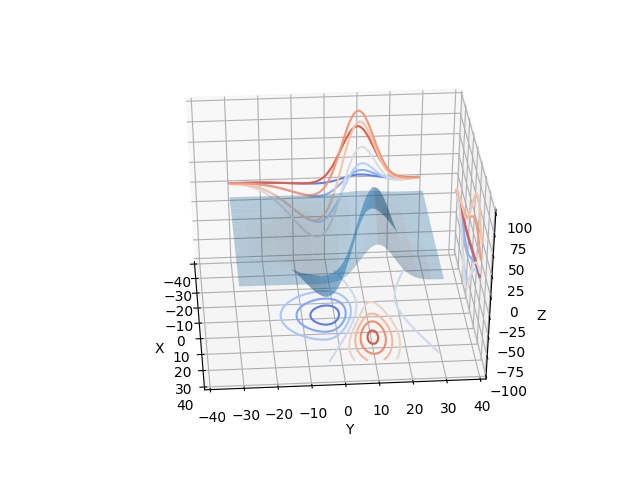

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

<IPython.core.display.Javascript object>


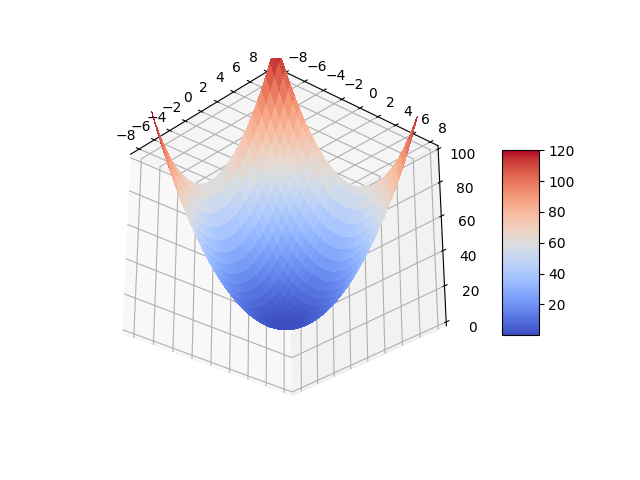

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

scale = 8
# Make data.
X = np.arange(-scale, scale, 0.25)
Y = np.arange(-scale, scale, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 100)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Query the depth
vth_dir = 'data/VTH/'
z_dir = 'data/Z/'